# Problem constants
- Medworld claim: 100mg medicine and 400mg of fillers in 500mg tablet with a variance 12.25 sq.mg or 3.5 mg standard deviation
- 50 randomly sampled data was taken

In [1]:
import pandas as pd
from scipy.stats import norm, t
import matplotlib.pyplot as plt
import numpy as np
from statistics import mean, pstdev, stdev
from typing import Tuple

# Read the data

In [2]:
df = pd.read_excel("is medworld cheating sample data.xlsx",header=None)
sample_values = df.values
sample_values = sample_values.flatten()
print('Below are the data of 50 random samples')
df

Below are the data of 50 random samples


,0,1,2,3,4,5,6,7,8,9
0,99.85,96.33,107.20,96.81,100.32,99.45,95.81,97.20,96.82,101.57
1,98.53,97.19,96.53,103.20,95.68,97.78,106.87,104.58,101.95,103.81
2,98.43,93.06,103.69,94.98,103.26,97.63,97.09,96.85,93.36,100.08
3,98.73,102.26,103.28,97.47,99.25,99.63,98.26,102.25,100.86,98.92
4,95.50,100.15,99.77,101.13,97.83,98.24,98.23,98.27,100.76,100.01


# Calculate sample mean and standard deviation
Below we calculate the mean and standard deviation of the samples taken

In [3]:
sample_mean = mean(sample_values)
sample_std_dev = stdev(sample_values)
print(f'sample_mean = {sample_mean} mg and sample standard deviation = {sample_std_dev} mg')

sample_mean = 99.3342 mg and sample standard deviation = 3.106956046929377 mg


# Estimating population mean of weights of medicine from the sample collected

## Prepare a confidence interval visualization for σ unknown

In [4]:
def view_confidence_interval_t_dist(confidence_interval: float,
                                    number_of_samples:int,
                                    sample_mean: float,
                                    sample_std_dev: float
                                    ):
    # declaring problem constants
    x_bar = sample_mean # sample mean
    n = number_of_samples # number of samples taken
    degree_of_freedom = n-1
    s = sample_std_dev
    s_x_bar = s/n**0.5
    # generate x and y axes
    x_lower = x_bar-3.5*s_x_bar
    x_upper = x_bar+3.5*s_x_bar
    x = np.arange(x_lower,x_upper,(x_upper-x_lower)/1000)
    y = t.pdf(x,degree_of_freedom,loc=sample_mean,scale=s_x_bar)
    # get the probabilities of the tail areas
    tail_areas = (1-confidence_interval)/2
    upper_limit_prob = 1-tail_areas
    lower_limit_prob = tail_areas
    # compute the value of x_lower and x_higher
    x_lower = t.ppf(lower_limit_prob,degree_of_freedom,loc=sample_mean,scale=s_x_bar)
    x_higher = t.ppf(upper_limit_prob,degree_of_freedom,loc=sample_mean,scale=s_x_bar)
    # plot and shade the graphs
    plt.plot(x,y,'-')
    plt.fill_between(x[x>=x_lower],y[x>=x_lower],color='green',alpha=0.7)
    plt.fill_between(x[x>=x_higher],y[x>=x_higher],color='white')
    plt.draw()
    return round(x_lower,2), round(x_higher,2)

## Prepare confidence interval visualization for σ known

In [5]:
def view_confidence_interval(confidence_interval: float,
                             population_std_dev: float,
                             number_of_samples:int,
                             mean: float
                            ):
    # declaring problem constants
    x_bar = mean # sample mean
    n = number_of_samples # number of samples taken
    sigma = population_std_dev # population standard deviation
    sigma_x_bar = sigma/n**0.5 # std dev of sample means
    # generate x and y axes
    x_axis_lower_bound = x_bar-3.5*sigma_x_bar
    x_axis_upper_bound = x_bar+3.5*sigma_x_bar
    steps = (x_axis_upper_bound-x_axis_lower_bound)/1000
    x = np.arange(x_axis_lower_bound,x_axis_upper_bound,steps)
    y = norm.pdf(x,loc=x_bar,scale=sigma_x_bar)
    # get the probabilities of the tail areas
    tail_areas = (1-confidence_interval)/2
    upper_limit_prob = 1-tail_areas
    lower_limit_prob = tail_areas
    # compute the value of x_lower and x_higher
    x_lower = norm.ppf(lower_limit_prob,loc=x_bar,scale=sigma_x_bar)
    x_higher = norm.ppf(upper_limit_prob,loc=x_bar,scale=sigma_x_bar)
    # plot and shade the graphs
    plt.plot(x,y,'-')
    plt.fill_between(x[x>=x_lower],y[x>=x_lower],color='red')
    plt.fill_between(x[x>=x_higher],y[x>=x_higher],color='white')
    plt.draw()
    return round(x_lower,2), round(x_higher,2)

## Get a 95% confidence interval band for σ unknown
We are disregarding the slated mean and standard deviation by Medworld

The mean medicine contents of the population is expected to lie between 98.45mg and 100.22mg with 95.0% confidence
while the slated mean is 100mg
Margin of error = ±0.884999999999998mg


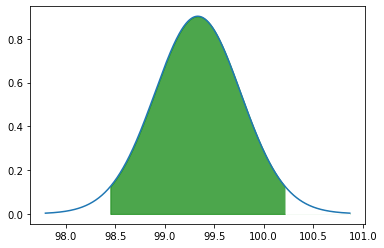

In [6]:
confidence_interval = 0.95
number_of_samples = len(sample_values)
sample_mean = sample_mean
sample_std_dev = sample_std_dev
x_lower, x_higher = view_confidence_interval_t_dist(confidence_interval,
                                                    number_of_samples,
                                                    sample_mean,
                                                    sample_std_dev
                                                    )
print(f'The mean medicine contents of the population is expected to lie between {x_lower}mg '\
      f'and {x_higher}mg with {confidence_interval*100}% confidence\n'\
      f'while the slated mean is 100mg'
     )
print(u'Margin of error = \u00B1{}mg'.format((x_higher-x_lower)/2))

## Inference
Thus from the above sample collected, the mean medicine content was found to be 99.3342 mg and with 95% confidence we can say that the actual mean of all the medicines produced by medworld is going to lie between 98.45mg and 100.22mg. So we don't have enough evidence to punish Medworld.

## Get a 95% confidence interval band for σ known
Considering σ = 3.5 mg as stated by MedWorld and μ = 100 mg

The mean medicine contents of the population is expected to lie between 98.36mg and 100.3mg with 95.0% confidence
Margin of error = ±0.9699999999999989mg


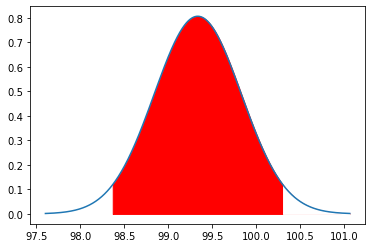

In [7]:
confidence_interval = 0.95
number_of_samples = len(sample_values)
population_std_dev = 3.5
sample_mean = sample_mean
sample_std_dev = sample_std_dev
x_lower, x_higher = view_confidence_interval(confidence_interval,
                             population_std_dev,
                             number_of_samples,
                             sample_mean
                            )
print(f'The mean medicine contents of the population is expected to lie between {x_lower}mg '\
      f'and {x_higher}mg with {confidence_interval*100}% confidence')
print(u'Margin of error = \u00B1{}mg'.format((x_higher-x_lower)/2))

# Hypothesis Test
Suppose Medworld is doing all right and are producing the medicines with μ = 100 mg and σ= 3.mg as stated.<br>
We took a sample of 50 tablets and found the mean to be sample_mean = 99.3342 mg and sample standard deviation = 3.11 mg<br>
We ask the question:<br>
<b>If we tolerate an error of 5% i.e. confidence interval of 95%, and assume that MedWorld is producing at the same stated mean and standard deviation, what will be the range of values of sample mean we might get?</b><br>
In other words we will visualize the following upper and lower limits of the set confidence interval with σ = 3.5 mg μ = 100 mg.

The sample means are expected to lie between: 99.03mg and 100.97mg 
while our actual sample mean was: 99.3342mg


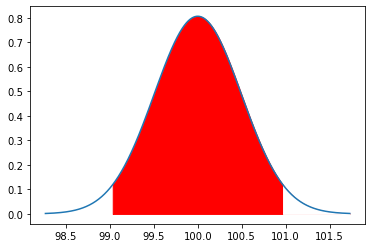

In [8]:
confidence_interval = 0.95
population_mean = 100
population_std_dev = 3.5
number_of_samples = len(sample_values)
sample_mean_lower, sample_mean_higher = view_confidence_interval(confidence_interval,population_std_dev,number_of_samples,population_mean)
print('The sample means are expected to lie between: {}mg and {}mg ' \
      '\nwhile our actual sample mean was: {}mg'.format(sample_mean_lower, sample_mean_higher, sample_mean))

## Inference:
If we assume MedWorld's claim of mean medicine content to be 100mg with standard deviation 3.5mg we are 95% sure that a random sample will have its mean in between 99.03mg and 100.97mg. The sample we collected had a mean in between the above range. Hence not enough evidence to punish MedWorld.

# Optimum number of samples to reduce desired margin of error
Below we will try to estimate what will be the optimum number of samples required considering confidence interval = 0.95 the same sample standard deviation estimate. We will take the approach of t-distribution iterative approach as population standard deviation we are assuming to be unknown. <br>
The desired margin of error should be ±0.5mg instead of the previous ±0.885mg

In [9]:
def iterate_over_sample_sizes(n: int,
                              confidence_interval: float,
                              sample_std_dev: float,
                              dmoe: float
                             ):
    degree_of_freedom = n-1
    # calculate the t value for the given confidence interval and degree of freedom
    alpha = (1+confidence_interval)/2
    t_value = t.ppf(alpha, degree_of_freedom,loc=0,scale=1)
    # calculate the dmoe for the given t value.
    dmoe_calc = (sample_std_dev/n**0.5)*t_value
    # check whether the dmoe calculated is around desired dmoe.
    if dmoe - 0.01*dmoe <= dmoe_calc <= dmoe + 0.01*dmoe:
        print(u'For the given condition, {} minimum number of samples required to get a CI: {} and DMOE: \u00B1{}'.format(n,confidence_interval,dmoe))
        return n
    else:
        # if we are getting a positive deviation from desired DMOE, increase number of samples
        if dmoe_calc > dmoe:
            sample_size_change = 1
        else:
            # if we are getting a negative deviation from desired DMOE, decrease number of samples
            sample_size_change = -1
        # iteration with change in sample size
        iterate_over_sample_sizes(n+sample_size_change,
                                  confidence_interval,
                                  sample_std_dev,
                                  dmoe
                                 )

In [10]:
confidence_interval = 0.95
number_of_samples = 10 # pilot sample
sample_std_dev = sample_std_dev
dmoe = 0.5
min_number_of_samples = iterate_over_sample_sizes(n=number_of_samples,
                                                  confidence_interval=confidence_interval,
                                                  sample_std_dev=sample_std_dev,
                                                  dmoe=dmoe
                                                 )

For the given condition, 148 minimum number of samples required to get a CI: 0.95 and DMOE: ±0.5


## Inference
If the guideline says that ±0.5mg deviation can cause trouble to patients then we have not got enough samples to prove MedWorld cheating. We require more sample to bring our DMOE down. Let's see for getting the same DMOE as per mean and standard deviation prescribed by MedWorld how many samples are required.

In [11]:
def minimum_samples(confidence_interval:float,
                    population_std_dev: float,
                    dmoe: float
                   ):
    prob_upper = (1+confidence_interval)/2
    prob_lower = (1-confidence_interval)/2
    z_upper = norm.ppf(prob_upper, loc=0, scale=1)
    z_lower = norm.ppf(prob_lower, loc=0, scale=1)
    min_samples = (population_std_dev*(z_upper - z_lower)/(2*dmoe))**2
    return int(round(min_samples,0))

In [12]:
confidence_interval:float = 0.95
population_std_dev: float = 3.5
dmoe: float = 0.5
min_samples = minimum_samples(confidence_interval, population_std_dev, dmoe)
print('For {}% confidence, with a population std. dev: {} and dmoe: \u00B1{} mg, {} minimum samples are required'.format(confidence_interval*100,population_std_dev,dmoe,min_samples))

For 95.0% confidence, with a population std. dev: 3.5 and dmoe: ±0.5 mg, 188 minimum samples are required


## Inference
Thus we can say that if we want our 95% confidence interval to be within ±0.5 mg even for MedWorld's claim of standard deviation of 3.5 mg we need 188+ samples to make the estimation.